In [1]:
from IPython.display import display, Math, Latex
# This is imported for proper rendering of Latex in Notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

# Practice Assignment

In [3]:
data_path_name = '/Users/sampadk04/Desktop/Programming/VSCode-Projects/Python/IITM/IITM-MLP/W2_Data_Preprocessing/DataPreprocessingGraded_dataset.csv'

data = pd.read_csv(data_path_name)

In [5]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [5]:
data.replace('?', np.nan, inplace=True)

In [7]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [9]:
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      739 non-null    object 
 1   V2      739 non-null    object 
 2   V3      739 non-null    float64
 3   V4      739 non-null    float64
 4   V5      739 non-null    object 
 5   Target  739 non-null    object 
dtypes: float64(2), object(4)
memory usage: 40.4+ KB


In [10]:
# This is a way to force change the dtype of columns in a pandas DataFrame
data1 = data1.astype({'V1':float, 'V2':float})
data1.info()
# We have changed the dtype of Column0 and Column1 to 'float64'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      739 non-null    float64
 1   V2      739 non-null    float64
 2   V3      739 non-null    float64
 3   V4      739 non-null    float64
 4   V5      739 non-null    object 
 5   Target  739 non-null    object 
dtypes: float64(4), object(2)
memory usage: 40.4+ KB


In [11]:
np.var(data1,axis=0)

V1    6.553131e+01
V2    3.332189e+01
V3    2.082618e+06
V4    5.961522e+02
dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data2 = mms.fit_transform(data1[['V1','V2','V3','V4']])

<function matplotlib.pyplot.show(close=None, block=None)>

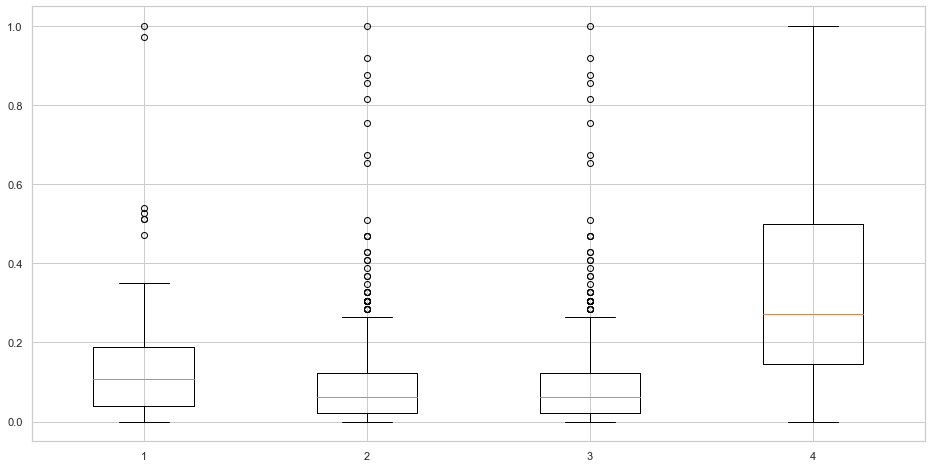

In [28]:
plt.figure(figsize=(16,8))
plt.boxplot(data2)
plt.show

In [29]:
data['Target'].value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [34]:
data.isna().sum()

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')
data3 = si.fit_transform(data[['V1','V2','V3','V4']])

In [43]:
type(data3)

numpy.ndarray

In [45]:
# Mean of V1
np.mean(data3[:,0])

9.552139037433156

In [46]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=3)
data3 = knn.fit_transform(data[['V1','V2','V3','V4']])

In [49]:
# Mean of first column
np.mean(data3[:,0])

9.532976827094473

In [50]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
data3 = si.fit_transform(data[['V1','V2','V3','V4']])

In [52]:
# Mean of V2
np.mean(data3[:,1])

5.464333781965007

# Graded Assignment

In [8]:
data = data.astype({'V1':float, 'V2':float})
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    float64
 1   V2      743 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(4), object(2)
memory usage: 35.2+ KB


In [28]:
X,y = np.array(data[['V1','V2','V3','V4','V5']]),np.array(data['Target'])

In [12]:
X[:5],y[:5]

(array([[2.0, 50.0, 12500.0, 98.0, 'NEGATIVE'],
        [0.0, 13.0, 3250.0, 28.0, 'NEGATIVE'],
        [nan, nan, 4000.0, 35.0, 'NEGATIVE'],
        [nan, 20.0, 5000.0, 45.0, 'NEGATIVE'],
        [1.0, 24.0, 6000.0, 77.0, 'NEGATIVE']], dtype=object),
 array(['YES', 'YES', 'YES', 'YES', 'NO'], dtype=object))

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

si = SimpleImputer(strategy='mean')
ss = StandardScaler()
oe = OrdinalEncoder()

# This data has 5 features, first 4 being numerical and last being categorical.

# for numerical features
ct_si = ColumnTransformer([
    ('simpleImpute_01', si, [0,1]),
    ('pass_23', 'passthrough', [2,3]),
])

num_pipe = Pipeline([
    ('selected_SI', ct_si),
    ('standardScaler', ss),
])

# for categorical features
# Since we have to process just one column, we don't need a whole pipeline, just selecting that column through column transformer and processing it is enough.
cat_pipe = ColumnTransformer([
    ('ordinalEncoder', oe, [4]),
])

# Combining these 3 pipelines
combined_pipe = FeatureUnion([
    ('numPipeline', num_pipe),
    ('catPipeline', cat_pipe),
])

In [17]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
combined_pipe

FeatureUnion(transformer_list=[('numPipeline',
                                Pipeline(steps=[('selected_SI',
                                                 ColumnTransformer(transformers=[('simpleImpute_01',
                                                                                  SimpleImputer(),
                                                                                  [0,
                                                                                   1]),
                                                                                 ('pass_23',
                                                                                  'passthrough',
                                                                                  [2,
                                                                                   3])])),
                                                ('standardScaler',
                                                 StandardScaler())])),
                               ('catPipeline',
                                ColumnTransformer(transformers=[('ordinalEncoder',
                                                                 OrdinalEncoder(),
                                                                 [4])]))])

In [21]:
X_new = combined_pipe.fit_transform(X)

In [24]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.1)
X_new = vt.fit_transform(X_new)
X_new.shape

(748, 4)

In [29]:
X_new,y_new = combined_pipe.fit_transform(X), oe.fit_transform(y.reshape(-1,1))

In [30]:
X_new[:5],y_new[:5]

(array([[-9.38169390e-01,  7.70986653e+00,  7.62334626e+00,
          2.61563344e+00,  0.00000000e+00],
        [-1.18627754e+00,  1.30454949e+00,  1.28273826e+00,
         -2.57880900e-01,  0.00000000e+00],
        [ 0.00000000e+00, -1.53758496e-16,  1.79684161e+00,
          2.94705348e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.51636623e+00,  2.48231275e+00,
          4.39972584e-01,  0.00000000e+00],
        [-1.06222347e+00,  3.20883294e+00,  3.16778388e+00,
          1.75357914e+00,  0.00000000e+00]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [0.]]))

In [45]:
y_new_1 = y_new.reshape(y_new.shape[0],)

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
rfe = RFE(estimator=lreg, n_features_to_select=2, step=1)
X_new_rfe = rfe.fit_transform(X_new,y_new_1)
X_new_rfe.shape

(748, 2)

In [52]:
# So, V1, V3 are selected
rfe.support_

array([ True, False,  True, False, False])

In [50]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
sfe_f = SequentialFeatureSelector(estimator=lreg, n_features_to_select=2)
X_new_sfe_f = sfe_f.fit_transform(X_new,y_new_1)
X_new_sfe_f.shape

(748, 2)

In [51]:
# V2 and V4 are selected
sfe_f.support_

array([False,  True, False,  True, False])

In [53]:
sfe_b = SequentialFeatureSelector(estimator=lreg, n_features_to_select=2, direction='backward')
X_new_sfe_b = sfe_b.fit_transform(X_new,y_new_1)
X_new_sfe_b.shape

(748, 2)

In [54]:
# So, V3,V4 are selected
sfe_b.support_

array([False, False,  True,  True, False])

# Solve With Instructers

The problems for these can be found at [MLP-SWI-W2](https://www.youtube.com/watch?v=povsySINTak).

## Task 1

In [57]:
M = np.array([
    [753, 1622, 3193],
    [np.nan, np.nan, 1966],
    [1200, 5, np.nan],
    [981, np.nan, 9211]
])

In [59]:
from sklearn.impute import SimpleImputer

si_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
si_median = SimpleImputer(missing_values=np.nan, strategy='median')
# by default missing_values = np.nan

M_mean = si_mean.fit_transform(M)
M_median = si_median.fit_transform(M)

print(M,M_mean,M_median, sep = '\n')

[[7.530e+02 1.622e+03 3.193e+03]
 [      nan       nan 1.966e+03]
 [1.200e+03 5.000e+00       nan]
 [9.810e+02       nan 9.211e+03]]
[[7.530e+02 1.622e+03 3.193e+03]
 [9.780e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 4.790e+03]
 [9.810e+02 8.135e+02 9.211e+03]]
[[7.530e+02 1.622e+03 3.193e+03]
 [9.810e+02 8.135e+02 1.966e+03]
 [1.200e+03 5.000e+00 3.193e+03]
 [9.810e+02 8.135e+02 9.211e+03]]


## Task 2

In [61]:
M = np.array([
    [0,1],
    [2,3],
    [10,100],
])

In [65]:
from sklearn.preprocessing import FunctionTransformer

ft_log = FunctionTransformer(func=np.log10)

M_ft_log = ft_log.fit_transform(M)

print(M,M_ft_log, sep = '\n')

[[  0   1]
 [  2   3]
 [ 10 100]]
[[      -inf 0.        ]
 [0.30103    0.47712125]
 [1.         2.        ]]


## Task 3

In [66]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
X,y = iris_data.drop('label',axis=1), iris_data['label']

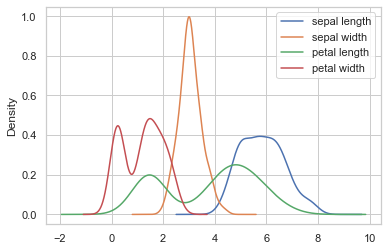

In [83]:
ax = X.plot.kde()

<function matplotlib.pyplot.show(close=None, block=None)>

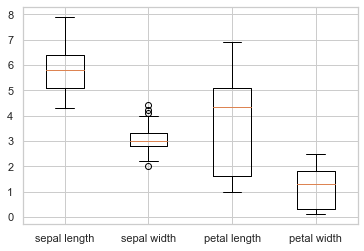

In [73]:
plt.figure()
plt.boxplot(X, labels=X.columns)
plt.show

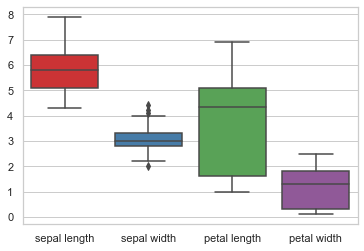

In [91]:
ay = sns.boxplot(data=X, palette="Set1")

<function matplotlib.pyplot.show(close=None, block=None)>

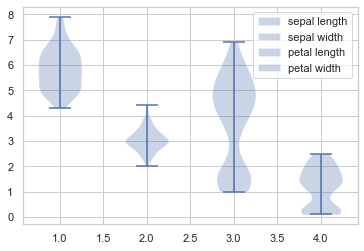

In [76]:
plt.figure()
plt.violinplot(X)
plt.legend(X.columns)
plt.show

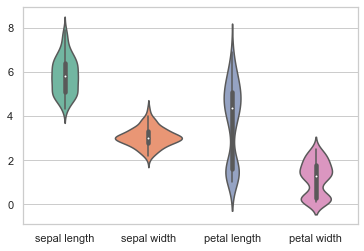

In [92]:
az = sns.violinplot(data=X, palette="Set2")

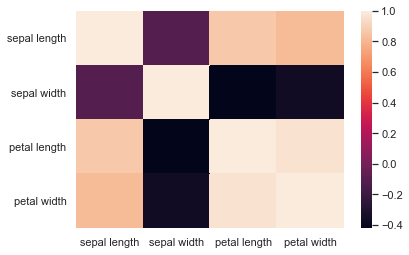

In [95]:
ax1 = sns.heatmap(data=X.corr())

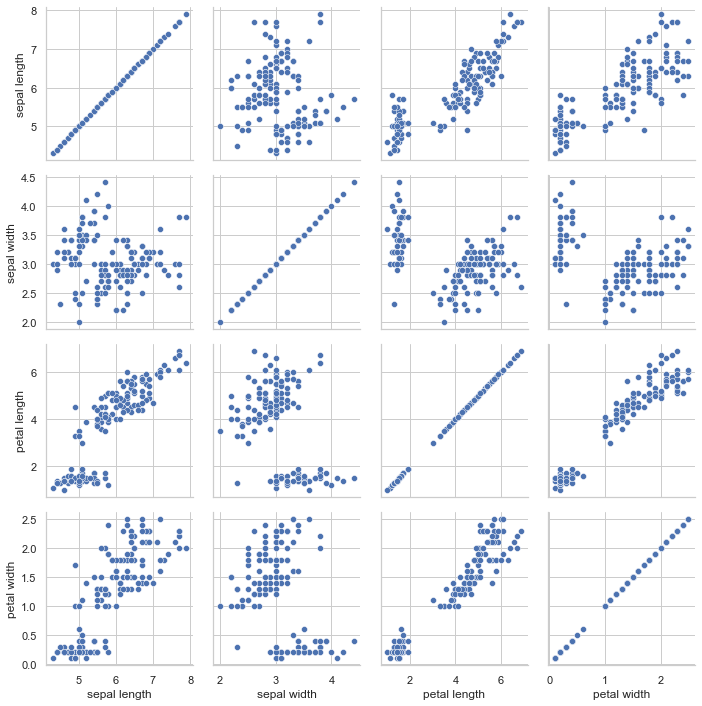

In [101]:
X_corr = sns.PairGrid(X)
X_corr.map(sns.scatterplot)

In [85]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)

print(X.shape, X_poly.shape, sep = '\n')

(150, 4)
(150, 15)


## Task 4

In [106]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(np.array(y).reshape(-1,1))

print(y.shape, y_ohe.shape)

(150,) (150, 3)


In [109]:
y_ohe.toarray()[45:55]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Task 5

In [111]:
from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y=True)
X,y = X[:1000,:],y[:1000]

In [115]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

sp = SelectPercentile(score_func=mutual_info_regression, percentile=10)
X_sp = sp.fit_transform(X,y)

print(X.shape, X_sp.shape)

(1000, 8) (1000, 1)


## Task 6

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# numeric pipeline
ct1 = ColumnTransformer([
    ('fantastic_4', 'passthrough', slice(0,4)),
])

num_pipe = Pipeline([
    ('selector', ct1),
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),
])

# categorical pipeline
cat_pipe = ColumnTransformer([
    ('label_binarizer', LabelBinarizer(), [4]),
])

# combined pipeline

combined_pipe = FeatureUnion([
    ('num_pipe',num_pipe),
    ('cat_pipe',cat_pipe),
])

In [119]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
combined_pipe

FeatureUnion(transformer_list=[('num_pipe',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('fantastic_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer', SimpleImputer()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipe',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])